In [1]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from tqdm import tqdm_notebook
from itertools import product

import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# VECTOR AUTO REGRESSION EQUATION:


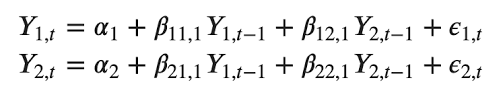

In [17]:
filepath = 'https://github.com/Nithish0226/VAR/raw/Main/annanagar.csv'
macro_data = pd.read_csv(filepath, parse_dates=['date'], index_col='date')
print(macro_data.shape)  # (123, 8)
macro_data.head()

(123, 4)


,rspn,so2,no2,noap
date,,,,
1959-01-01,1606.4,1608.3,47.5,37
1959-01-04,1637.0,1622.2,47.5,37
1959-01-07,1629.5,1636.2,48.7,38
1959-01-10,1643.4,1650.3,48.8,38
1960-01-01,1671.6,1664.6,49.1,38


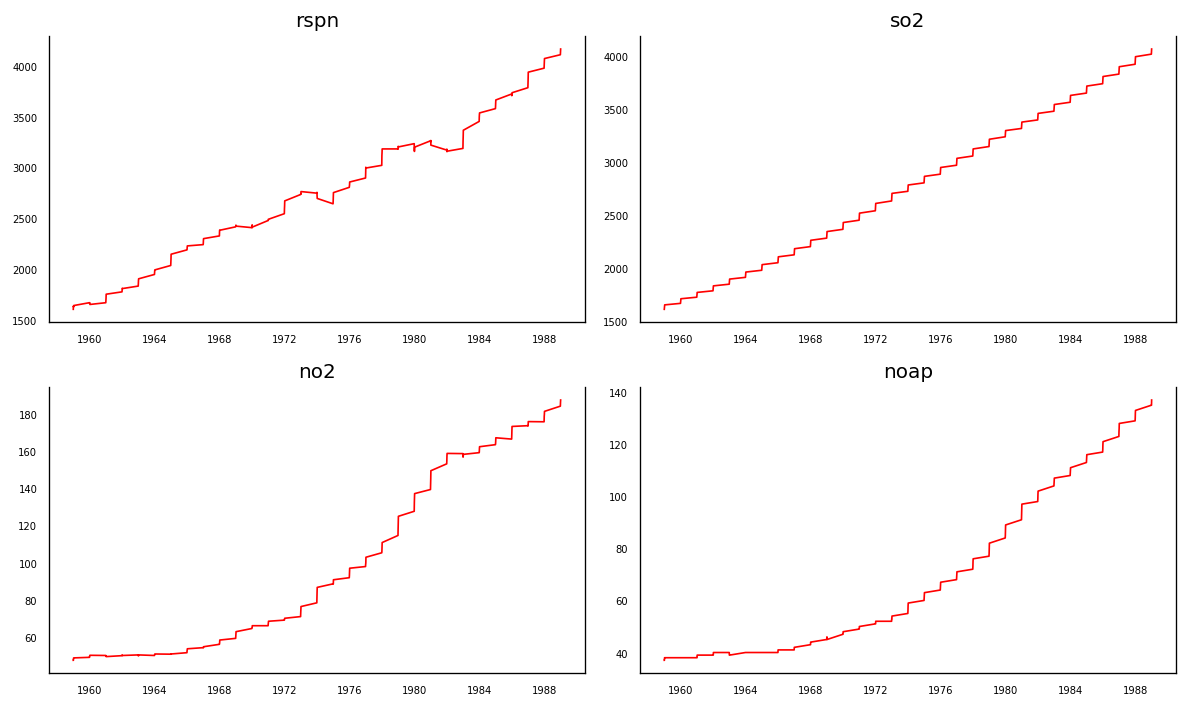

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = macro_data[macro_data.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(macro_data.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [24]:
ad_fuller_result_1 = adfuller(macro_data['rspn'].diff()[1:])


print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(macro_data['noap'].diff()[1:])

print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

realgdp
ADF Statistic: -5.427594381007333
p-value: 2.9633019848469254e-06

---------------------

realcons
ADF Statistic: -1.450668386954082
p-value: 0.5577587304781698


In [25]:

print('------------------')
granger_1 = grangercausalitytests(macro_data[['rspn', 'noap']], 4)


print('------------------')
granger_2 = grangercausalitytests(macro_data[['noap', 'rspn']], 4)

rgnp causes ulc?

------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.2548  , p=0.1358  , df_denom=119, df_num=1
ssr based chi2 test:   chi2=2.3117  , p=0.1284  , df=1
likelihood ratio test: chi2=2.2900  , p=0.1302  , df=1
parameter F test:         F=2.2548  , p=0.1358  , df_denom=119, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.3887  , p=0.0371  , df_denom=116, df_num=2
ssr based chi2 test:   chi2=7.0695  , p=0.0292  , df=2
likelihood ratio test: chi2=6.8707  , p=0.0322  , df=2
parameter F test:         F=3.3887  , p=0.0371  , df_denom=116, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.2234  , p=0.0893  , df_denom=113, df_num=3
ssr based chi2 test:   chi2=7.0834  , p=0.0693  , df=3
likelihood ratio test: chi2=6.8822  , p=0.0757  , df=3
parameter F test:         F=2.2234  , p=0.0893  , df_denom=113, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F

In [26]:
macro_data = macro_data[['noap','rspn']]
print(macro_data.shape)

(123, 2)


In [27]:
train_df=macro_data[:-12]
test_df=macro_data[-12:]

In [28]:
print(test_df.shape)

(12, 2)


In [29]:
model = VAR(train_df.diff()[1:])

In [30]:
sorted_order=model.select_order(maxlags=20)
print(sorted_order.summary())


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        6.095       6.150       443.6       6.117
1        5.942       6.108       380.6       6.009
2        5.515      5.793*       248.6       5.627
3        5.541       5.930       255.2       5.698
4       5.299*       5.799      200.4*      5.500*
5        5.329       5.940       206.8       5.576
6        5.359       6.081       213.4       5.651
7        5.370       6.203       216.2       5.706
8        5.389       6.333       220.9       5.769
9        5.405       6.460       225.3       5.830
10       5.359       6.525       216.2       5.829
11       5.413       6.691       229.5       5.928
12       5.380       6.769       223.7       5.941
13       5.460       6.960       244.3       6.065
14       5.529       7.140       264.3       6.179
15       5.585       7.307       282.6       6.280
16       5.673       7.506     

In [31]:
var_model = VARMAX(train_df, order=(4,0),enforce_stationarity= True)
fitted_model = var_model.fit(disp=False)
print(fitted_model.summary())

                           Statespace Model Results                           
Dep. Variable:       ['noap', 'rspn']   No. Observations:                  111
Model:                         VAR(4)   Log Likelihood                -618.759
                          + intercept   AIC                           1279.518
Date:                Wed, 22 Dec 2021   BIC                           1336.418
Time:                        13:43:26   HQIC                          1302.601
Sample:                             0                                         
                                - 111                                         
Covariance Type:                  opg                                         
Ljung-Box (Q):                51.37, 38.64   Jarque-Bera (JB):           2.39, 4.25
Prob(Q):                        0.11, 0.53   Prob(JB):                   0.30, 0.12
Heteroskedasticity (H):         0.83, 3.48   Skew:                      0.20, -0.20
Prob(H) (two-sided):            0.58,

In [32]:
n_forecast = 12
predict = fitted_model.get_prediction(start=len(train_df),end=len(train_df) + n_forecast-1)#start="1989-07-01",end='1999-01-01')

predictions=predict.predicted_mean

In [47]:
predictions.columns=['noap_p','rspn_p']
predictions

,noap_p,rspn_p
111,120.916791,3717.849135
112,122.462544,3727.465619
113,123.562348,3729.414213
114,124.808651,3737.766256
115,125.896390,3741.061185
116,126.999115,3746.687315
117,128.015331,3750.502222
118,129.015119,3754.772611
119,129.956665,3758.268043
120,130.869920,3761.775859


In [43]:
test_vs_pred=pd.concat([test_df,predictions],axis=1)

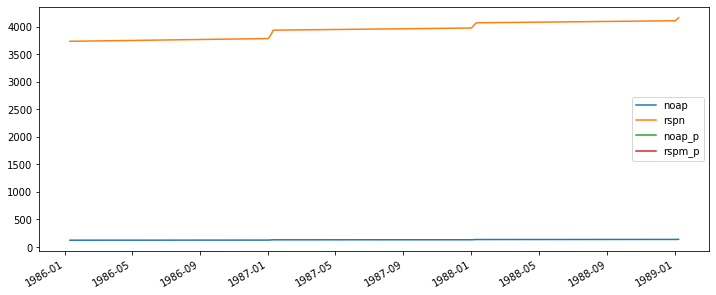

In [44]:
test_vs_pred.plot(figsize=(12,5))

In [56]:
from sklearn.metrics import mean_squared_error
import math 
from statistics import mean

rmse_ulc=math.sqrt(mean_squared_error(predictions['noap_p'],test_df['noap']))
print('Mean value of ULC is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['noap']),rmse_ulc))

print('Accquracy is :{}'.format((100-rmse_ulc))

Mean value of ULC is : 129.5. Root Mean Squared Error is :2.6071254262336145
Accquracy is :97.39287457376639
